In [49]:
## import statements ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, f1_score

% matplotlib inline
sns.set_context('talk')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

**Import Data from XLS file**

Using pandas to import the dataset and transform into a Dataframe.

In [50]:
data_files = 'Comment Spam.xls'

data = pd.read_excel(data_files)
data = data[['Comment', 'Class']]
train_data = data
train_data.head()

Comment  Class
0                                this song is racist      0
1  and how many subscribers compared to her over ...      1
2  HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...      1
3                                  well done shakira      0
4                 :D subscribe to me for daily vines      1

In [51]:
train_data['Class'].value_counts()

1    669
0    631
Name: Class, dtype: int64

**Data Cleansing Step**

1. Remove any symbols in the comments,
2. Convert to lowercase.

In [52]:
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [53]:
train_data['processed_comment'] = train_data['Comment'].apply(process_content)

In [54]:
train_data.head()

Comment  Class  \
0                                this song is racist      0   
1  and how many subscribers compared to her over ...      1   
2  HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...      1   
3                                  well done shakira      0   
4                 :D subscribe to me for daily vines      1   

                                   processed_comment  
0                                this song is racist  
1  and how many subscribers compared to her over ...  
2  hi check out our awesome covers and say what y...  
3                                  well done shakira  
4                  d subscribe to me for daily vines

**Split the data**

Split the data for data training of 80% and data testing of 20% with random pick of 57.
- Data Training : `X_train & y_train`
- Data Testing : `X_test & y_test`

In [55]:
X_train, X_test, y_train, y_test = train_test_split(train_data['processed_comment'],train_data['Class'],test_size=0.2,random_state=57)

**Data Pipeline**

1. Data Cleansing using `CountVectorize` with stop_word='english' to remove the stop word
2. Data transforming using `TF-IDF`
3. Model Training using `LogisticRegression`

In [56]:
model = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression()),
                     ])

**Fitting the model**

In [57]:
model.fit(X_train, y_train)

C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

**Predict the data testing**

In [58]:
predicted = model.predict(X_test)

C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


**Confusion Matrix**

In [59]:
confusion_matrix(y_test,predicted)

array([[132,   7],
       [  8, 113]])

**Accuracy Score & Classification Report**

In [60]:
print('accuracy_score',accuracy_score(y_test,predicted))
print('Reporting...')

accuracy_score 0.9423076923076923
Reporting...


In [61]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       139
          1       0.94      0.93      0.94       121

avg / total       0.94      0.94      0.94       260



**Model Evaluation using Cross Validation**

On the data training

In [62]:
cross_val_score(model, X_train, y_train, cv=5)

C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Rosyiq\Ana

array([0.94258373, 0.95215311, 0.94230769, 0.93719807, 0.90821256])

On the data testing

In [63]:
cross_val_score(model, X_test, y_test, cv=5)

C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\Rosyiq\Ana

array([0.9245283 , 0.94230769, 0.90384615, 0.86538462, 0.94117647])

**New Data Sample Test**

In [20]:
c1 = ['Omg!']
content = pd.DataFrame(c1, columns=['Comment'])

In [21]:
test_data = pd.DataFrame(c1, columns=['Comment'])
test_data['processed_comment'] = test_data['Comment'].apply(process_content)
x_test_new = test_data['processed_comment']

model1.predict(x_test_new)

C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


array([0], dtype=int64)

**Building Model with ROC Curve**

In [37]:
def accuracy_model_with_roc( dataframe, y1):
    models = {
        'lr': Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', LogisticRegression()),
                       ])
    }
    
    X_train, X_test, y_train, y_test = train_test_split(dataframe,y1,test_size=0.2,random_state=57)
    
    counter = 0
    f, ax = plt.subplots(1, 1)

    for index, model in models.items():
        clf = model

        func = clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_test)[:,1]
        pred_class = clf.predict(X_test)

        fpr, tpr, _ = roc_curve(y_test, pred)
        
        roc_auc = auc( fpr, tpr )
        fscore = f1_score(y_test, pred_class, average='macro')
        
        ax.plot(fpr, tpr, label='ROC curve %s (area = %0.2f) \n fscore %s : %0.2f' % (index, roc_auc, index, fscore) )

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_title('ROC Curve ')
    ax.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    counter = counter + 1
    plt.tight_layout()

C:\Users\Rosyiq\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


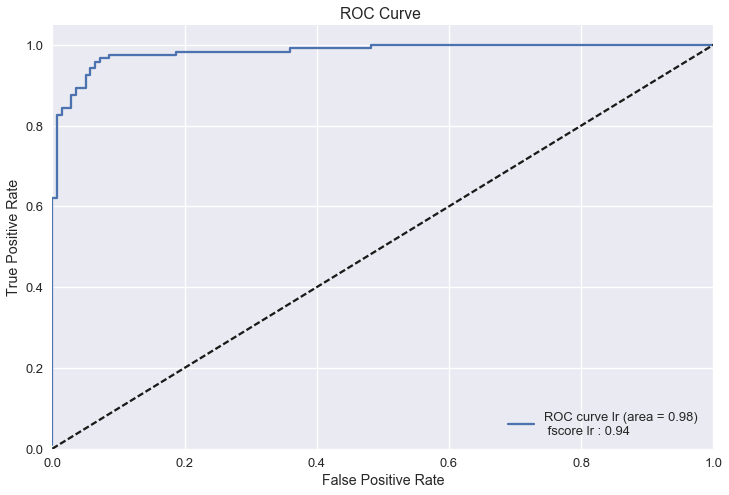

In [29]:
accuracy_model_with_roc( train_data['processed_comment'], train_data['Class'])